In [2]:
#导入数据
import numpy as np
np.random.seed(0)
n_samples_1 = 1000
n_samples_2 = 100
X = np.r_[1.5*np.random.randn(n_samples_1,2),0.5*np.random.randn(n_samples_2,2)+[2,2]]
y = np.r_[[0]*n_samples_1,[1]*n_samples_2]

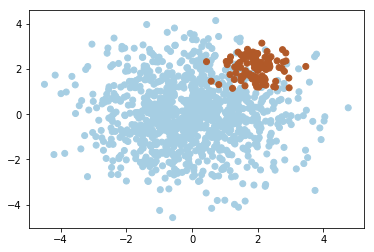

In [3]:
#数据可视化
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X[:,0],X[:,1],c = y,cmap = plt.cm.Paired)
plt.show()

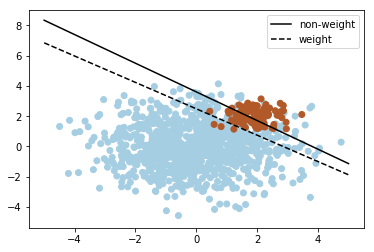

In [5]:
from sklearn import svm
clf_nonweight = svm.SVC(kernel = 'linear')
clf_weight = svm.SVC(kernel = 'linear',class_weight = {1:10})
for clf,linestyle,label in zip([clf_nonweight,clf_weight],['k-','k--'],['non-weight','weight']):
    clf.fit(X,y)
    coef = clf.coef_[0]
    intercept = clf.intercept_[0]
    xmin,xmax = -5,5
    ymin = (-coef[0]*xmin-intercept)/coef[1]
    ymax = (-coef[0]*xmax-intercept)/coef[1]
    plt.plot([xmin,xmax],[ymin,ymax],linestyle,label = label)
plt.scatter(X[:,0],X[:,1],c = y,cmap = plt.cm.Paired)
plt.axis('tight')
plt.legend()
plt.savefig('unbalanced_classes_svm.pdf')#在show之前保存
plt.show()